In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

### Fetching Flight data

In [2]:
# fetch data 

mco_syr_sw_data = pd.read_csv('flight_data/mco_syr_sw_combined.csv')
mco_syr_jb_data = pd.read_csv('flight_data/mco_syr_jb_combined.csv')
jfk_syr_jb_data = pd.read_csv('flight_data/jfk_syr_jb_combined.csv')
jfk_syr_end_data = pd.read_csv('flight_data/jfk_syr_dl_combined.csv')
ord_syr_ua_data = pd.read_csv('flight_data/ord_syr_ua_combined.csv')
ord_syr_aa_data = pd.read_csv('flight_data/ord_syr_aa_combined.csv')

In [3]:
dfs = [ord_syr_aa_data,ord_syr_ua_data,jfk_syr_end_data,jfk_syr_jb_data,mco_syr_jb_data,mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2020-01-04,"3,580.00",N240NN,SYR,7:55,8:21,112.00,87.00,...,10:43,5.00,0.00,0.00,0.00,0.00,0.00,10,5,2020
1,1,MQ,2020-01-11,"3,946.00",N247NN,SYR,15:00,15:09,108.00,132.00,...,18:13,8.00,9.00,0.00,24.00,0.00,0.00,17,5,2020
2,2,MQ,2020-01-18,"3,946.00",N265NN,SYR,15:00,16:27,108.00,147.00,...,19:45,9.00,0.00,4.00,39.00,0.00,83.00,17,5,2020
3,3,MQ,2020-01-25,"3,946.00",N281NN,SYR,15:00,14:55,108.00,126.00,...,17:56,5.00,0.00,0.00,0.00,0.00,0.00,17,5,2020
4,4,MQ,2020-02-01,"3,946.00",N283NN,SYR,15:00,14:57,108.00,99.00,...,17:32,4.00,0.00,0.00,0.00,0.00,0.00,17,5,2020


8661

In [4]:
main_data.isna().sum()

Unnamed: 0                             0
Carrier_Code                           0
Date                                   0
Flight_Number                          0
Tail_Number                           74
Destination_Airport                    0
Scheduled departure time               0
Actual departure time                  0
Scheduled elapsed time (Minutes)       0
Actual elapsed time (Minutes)          0
Departure delay (Minutes)              0
Wheels-off time                        0
Taxi-Out time (Minutes)                0
dep_Delay_Carrier                      0
dep_Delay_Weather                      0
dep_Delay_National_Aviation_System     0
dep_Delay_Security                     0
dep_Delay_Late_Aircraft_Arrival        0
dep_hour                               0
dep_day                                0
dep_year                               0
dep_order                              0
Origin_Airport                         0
Scheduled Arrival Time                 0
Actual Arrival T

In [5]:
main_data.dtypes

Unnamed: 0                              int64
Carrier_Code                           object
Date                                   object
Flight_Number                         float64
Tail_Number                            object
Destination_Airport                    object
Scheduled departure time               object
Actual departure time                  object
Scheduled elapsed time (Minutes)      float64
Actual elapsed time (Minutes)         float64
Departure delay (Minutes)             float64
Wheels-off time                        object
Taxi-Out time (Minutes)               float64
dep_Delay_Carrier                     float64
dep_Delay_Weather                     float64
dep_Delay_National_Aviation_System    float64
dep_Delay_Security                    float64
dep_Delay_Late_Aircraft_Arrival       float64
dep_hour                                int64
dep_day                                 int64
dep_year                                int64
dep_order                         

### Preprocessing flight data

In [6]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival',
                         'dep_year','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [7]:
sub_data.dtypes


Carrier_Code                  object
Date                          object
Flight_Number                float64
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                       int64
dep_day                        int64
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                       int64
arr_day                        int64
dtype: object

In [8]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day
0,MQ,2020-01-04,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,10:47,1.00,10,5
1,MQ,2020-01-11,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,17:48,33.00,17,5
2,MQ,2020-01-18,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,17:48,126.00,17,5
3,MQ,2020-01-25,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,17:48,13.00,17,5
4,MQ,2020-02-01,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,17:48,-12.00,17,5


In [9]:
sub_data['dep_min'] = sub_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
sub_data['Date'] = pd.to_datetime( sub_data['Date'],format ="%Y-%m-%d")
sub_data['Date'] = sub_data['Date'].dt.strftime('%m/%d/%Y')
# sub_data['dep_minutes'] = 0
# sub_data['dep_minutes'] = sub_data['dep_minutes'].astype('object')
sub_data['dep_hours'] = sub_data['dep_hour'].astype('object')
sub_data['dep_min'] = sub_data['dep_min'].astype('object')
sub_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
# sub_data['arr_minutes'] = 0
# sub_data['arr_minutes'] = sub_data['arr_minutes'].astype('object')
sub_data['arr_hours'] = sub_data['arr_hour'].astype('object')
sub_data['arr_min'] = sub_data['arr_min'].astype('object')
sub_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
sub_data['dep_hour'] = main_data['dep_hour'].astype('object')
sub_data['dep_day'] = main_data['dep_day'].astype('object')
sub_data['arr_hour'] = main_data['arr_hour'].astype('object')
sub_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (sub_data['Arrival Delay (Minutes)'] > 5),
    (sub_data['Arrival Delay (Minutes)'] >=-5) & (sub_data['Arrival Delay (Minutes)'] <= 5),
    (sub_data['Arrival Delay (Minutes)'] < -5)
]
conditions2 = [
    (sub_data['Departure delay (Minutes)'] > 5),
    (sub_data['Departure delay (Minutes)'] >=-5) & (sub_data['Departure delay (Minutes)'] <= 5),
    (sub_data['Departure delay (Minutes)'] < -5)
]
choices = [2,1,0]
sub_data['arr_status'] = np.select(conditions, choices)
sub_data['dep_status'] = np.select(conditions2, choices)
sub_data.dtypes
sub_data.head()
len(sub_data)

Carrier_Code                  object
Date                          object
Flight_Number                 object
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                      object
dep_day                       object
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                      object
arr_day                       object
dep_min                       object
dep_hours                     object
arr_min                       object
arr_hours                     object
arr_status                     int32
dep_status                     int32
dtype: object

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,dep_hours,arr_min,arr_hours,arr_status,dep_status
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,10:47,1.00,10,5,55,7,47,10,1,2
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,17:48,33.00,17,5,0,15,48,17,2,2
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,17:48,126.00,17,5,0,15,48,17,2,2
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,17:48,13.00,17,5,0,15,48,17,2,1
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,17:48,-12.00,17,5,0,15,48,17,0,1


8661

In [10]:
#sub_data.to_csv('sub_data.csv', index=False)

In [11]:
len(sub_data)
sub_data= sub_data[sub_data['Arrival Delay (Minutes)'] < 120]
len(sub_data)

8661

8405

### Fetching Weather data

In [12]:
# Read and process weather data files for each airport

jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
#weather_data['dep_minutes'] = weather_data['dep_minutes'].astype('object')
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
#syr_weather_data['arr_minutes'] = syr_weather_data['arr_minutes'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,Origin_Airport
0,261.20,100,3.80,-26.20,NaN,0.00,1002,final,88,0.00,5.60,16,Overcast clouds,804,220,6.00,3.60,12/31/2019,19,JFK
1,270.50,100,3.90,-37.50,NaN,0.25,1003,final,85,0.00,6.30,16,Overcast clouds,804,220,6.80,5.37,12/31/2019,20,JFK
2,281.40,100,3.70,-48.80,NaN,0.00,1003,final,82,0.00,6.50,16,Overcast clouds,804,255,8.00,7.45,12/31/2019,21,JFK
3,296.30,100,1.60,-59.60,NaN,0.00,1002,final,73,0.00,6.10,16,Overcast clouds,804,270,9.30,6.70,12/31/2019,22,JFK
4,320.80,100,0.70,-68.60,NaN,0.00,1003,final,69,0.00,6.00,16,Overcast clouds,804,270,10.40,7.45,12/31/2019,23,JFK


,arr_azimuth,arr_clouds,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours
0,260.90,100,-2.30,-24.90,NaN,0.00,987,final,78,0.00,1.10,14,Overcast clouds,804,240,9.60,4.59,12/31/2019,19
1,270.70,100,-3.00,-35.80,NaN,0.00,987,final,77,0.00,0.60,16,Overcast clouds,804,240,9.60,4.59,12/31/2019,20
2,282.10,100,-4.00,-46.60,NaN,0.00,986,final,71,0.00,0.60,16,Overcast clouds,804,240,10.40,5.70,12/31/2019,21
3,297.00,100,-4.40,-56.90,NaN,0.00,987,final,69,0.00,0.60,16,Overcast clouds,804,250,10.40,6.20,12/31/2019,22
4,319.80,100,-4.40,-65.60,NaN,0.00,986,final,69,0.00,0.60,14,Overcast clouds,804,250,10.80,6.20,12/31/2019,23


dep_azimuth                float64
dep_clouds                   int64
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
dtype: object

### Mearging flight and weather data

In [13]:
sub_data = pd.merge(sub_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,88,0.00,-1.10,11,Overcast clouds,804,320,6.80,3.10
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,96,8.50,-0.60,2,Light snow,600,20,15.90,10.80
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,92,4.00,0.80,6,Light snow,600,255,8.20,4.34
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,73,0.00,2.40,16,Overcast clouds,804,255,10.40,5.37
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,56,0.00,1.60,16,Overcast clouds,804,235,7.60,3.85


In [14]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, syr_weather_data, how='left', on=['Date', 'arr_hours'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,92,0.00,2.80,6,Light rain,500,350,5.09,5.09
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,83,0.00,15.00,16,Light rain,500,150,11.50,2.10
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,96,1.50,1.10,3,Sleet,611,110,2.60,2.60
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,75,0.00,0.00,16,Overcast clouds,804,245,1.60,0.80
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,64,0.00,-8.90,16,Overcast clouds,804,245,2.80,1.20


In [15]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    74
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_hours                       0
arr_min                         0
arr_hours                       0
arr_status                      0
dep_status                      0
dep_azimuth                     0
dep_clouds                      0
dep_dewpt                       0
dep_elev_angle                  0
dep_h_angle                  8405
dep_precip                      0
dep_pres                        0
dep_revision_status             0
dep_rh                          0
dep_snow      

In [16]:
sub_data.columns

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'Departure delay (Minutes)', 'dep_hour',
       'dep_day', 'dep_order', 'Origin_Airport', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)', 'arr_hour', 'arr_day', 'dep_min',
       'dep_hours', 'arr_min', 'arr_hours', 'arr_status', 'dep_status',
       'dep_azimuth', 'dep_clouds', 'dep_dewpt', 'dep_elev_angle',
       'dep_h_angle', 'dep_precip', 'dep_pres', 'dep_revision_status',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.description',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_azimuth', 'arr_clouds', 'arr_dewpt', 'arr_elev_angle',
       'arr_h_angle', 'arr_precip', 'arr_pres', 'arr_revision_status',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.description',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd'],
      dtype='object')

In [17]:
# sub_data.to_csv('merged_data.csv', index=False)


In [18]:
#sub_data.rename(columns={'Arrival Delay (Minutes)':'arr_delay'}, inplace=True)


In [19]:
sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
                       'Scheduled departure time','Scheduled Arrival Time','dep_order', 
                        'arr_hours', 'dep_hours','arr_weather.description', 'dep_weather.description',
                        'Arrival Delay (Minutes)','Departure delay (Minutes)','arr_elev_angle','arr_h_angle',
                        'arr_revision_status','dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],
              inplace = True)


In [20]:
sub_data.dtypes
sub_data.columns
sub_data.head()
sub_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_status             int32
dep_status             int32
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,dep_status,dep_clouds,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,7,5,ORD,10,5,55,47,1,2,100,...,1.50,991,92,0.00,2.80,6,500,350,5.09,5.09
1,15,5,ORD,17,5,0,48,2,2,100,...,1.50,994,83,0.00,15.00,16,500,150,11.50,2.10
2,15,5,ORD,17,5,0,48,2,1,100,...,1.50,994,96,1.50,1.10,3,611,110,2.60,2.60
3,15,5,ORD,17,5,0,48,0,1,100,...,0.00,994,75,0.00,0.00,16,804,245,1.60,0.80
4,15,5,ORD,17,5,0,48,0,1,100,...,0.00,1009,64,0.00,-8.90,16,804,245,2.80,1.20


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
arr_status           0
dep_status           0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dtype: int64

In [21]:
#sub_data.to_csv('merged_data.csv', index=False)


### Analysing combined data

In [22]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')


<Axes: >

dep_hour


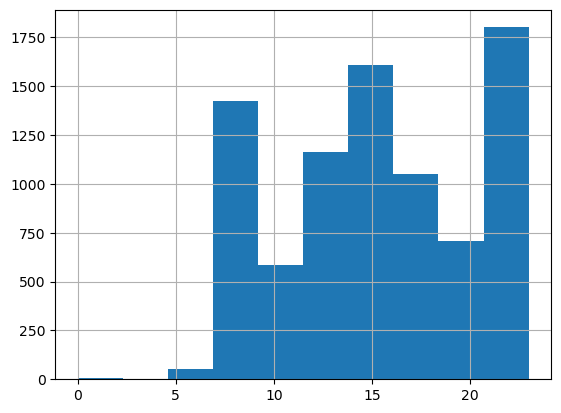

<Axes: >

dep_day


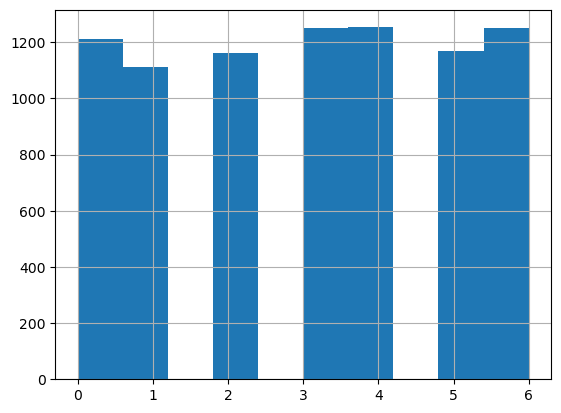

<Axes: >

Origin_Airport


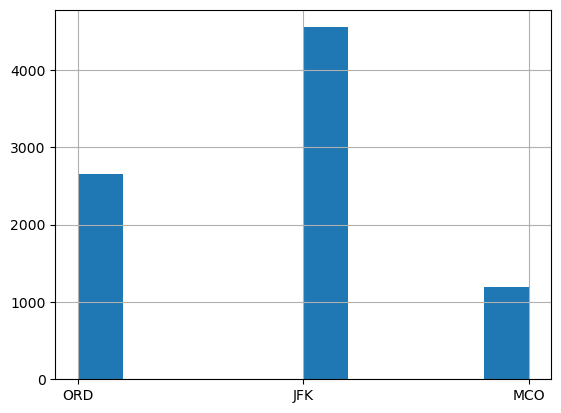

<Axes: >

arr_hour


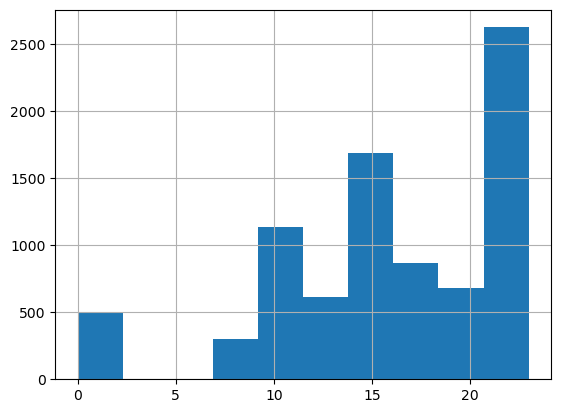

<Axes: >

arr_day


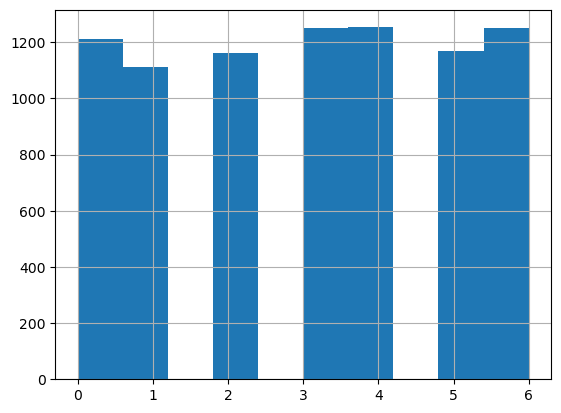

<Axes: >

dep_min


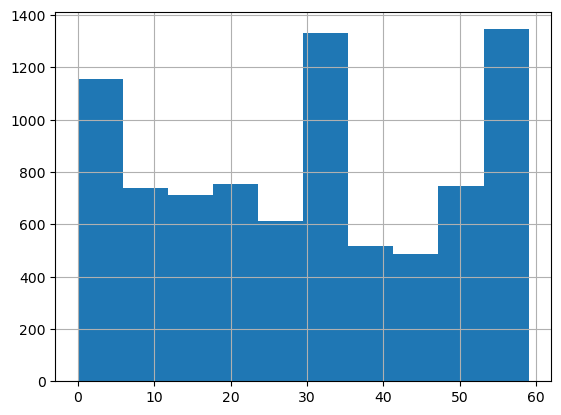

<Axes: >

arr_min


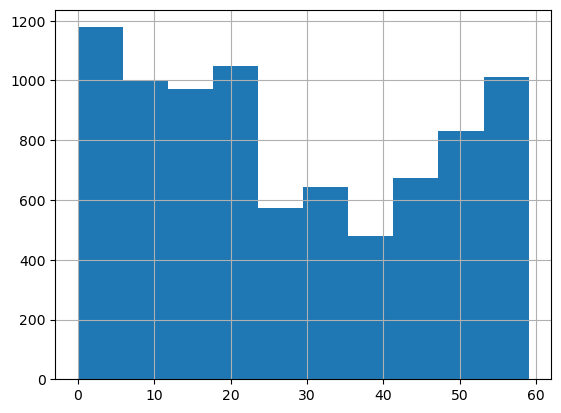

<Axes: >

arr_status


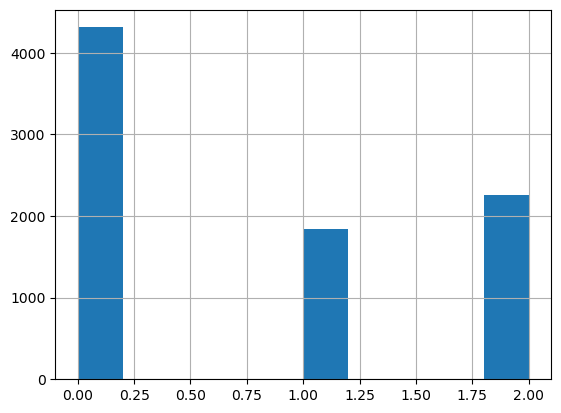

<Axes: >

dep_status


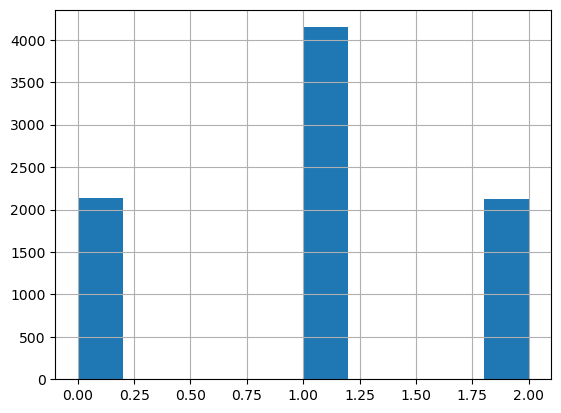

<Axes: >

dep_clouds


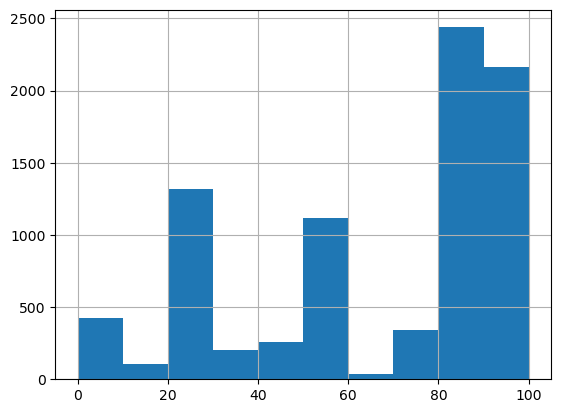

<Axes: >

dep_dewpt


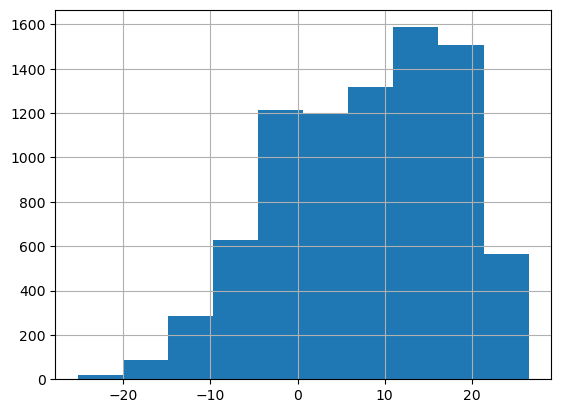

<Axes: >

dep_precip


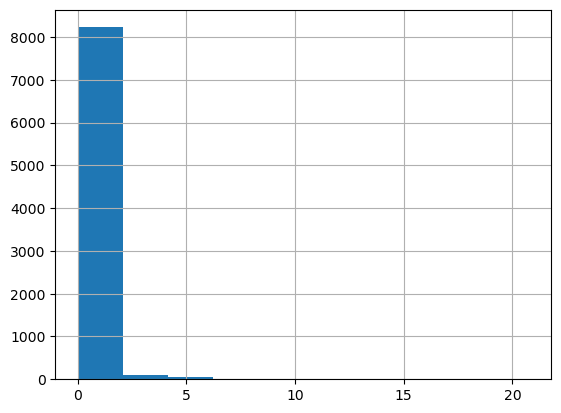

<Axes: >

dep_pres


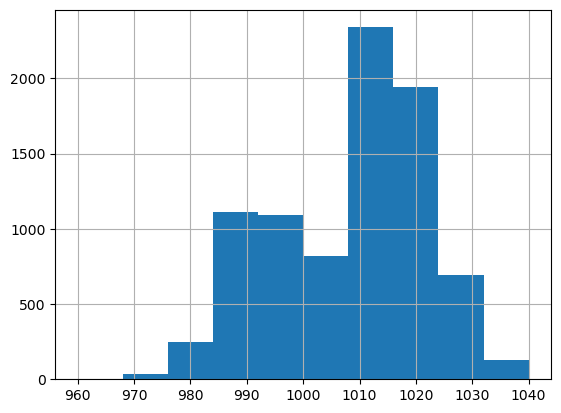

<Axes: >

dep_rh


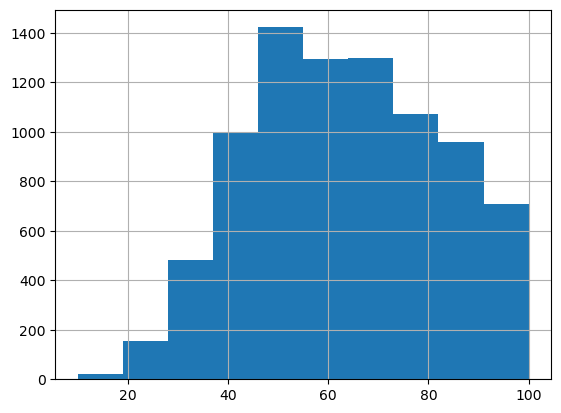

<Axes: >

dep_snow


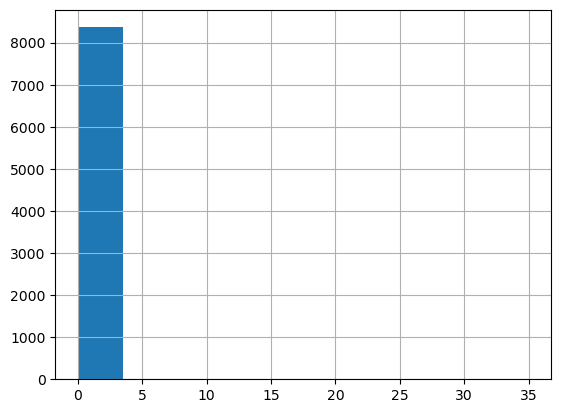

<Axes: >

dep_temp


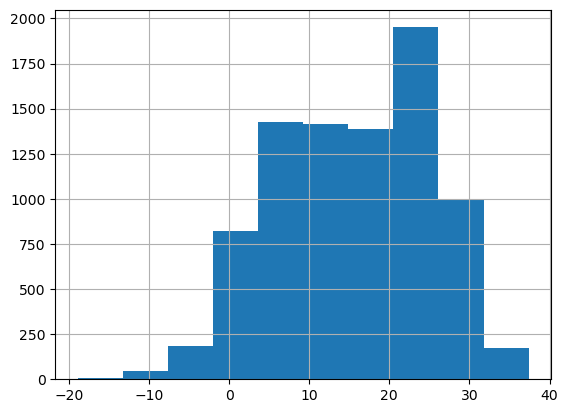

<Axes: >

dep_vis


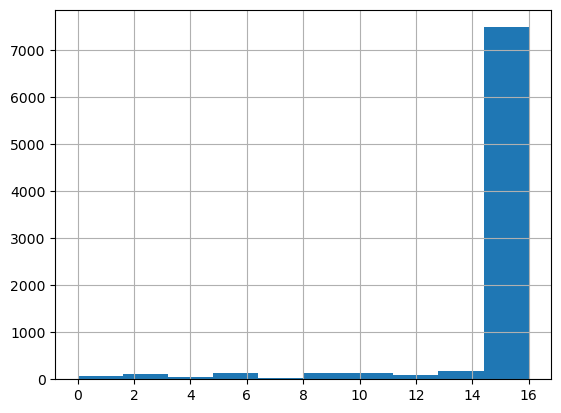

<Axes: >

dep_weather.code


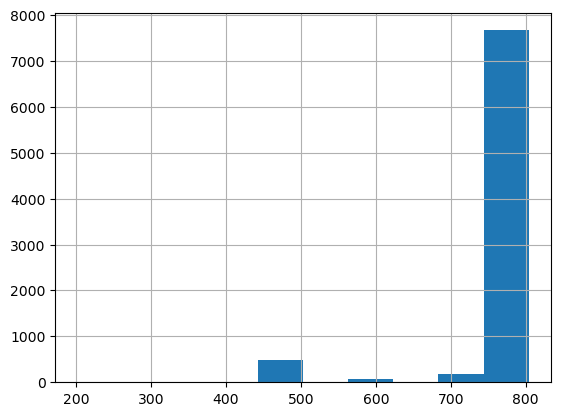

<Axes: >

dep_wind_dir


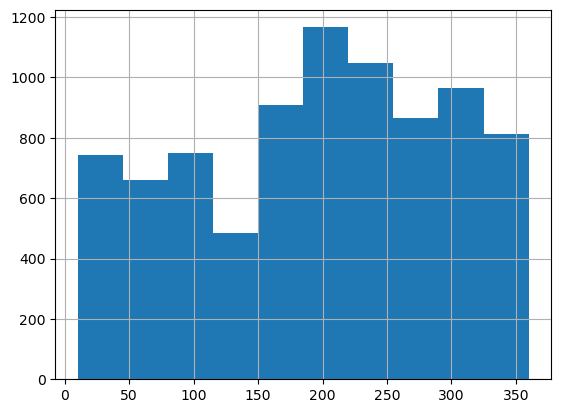

<Axes: >

dep_wind_gust_spd


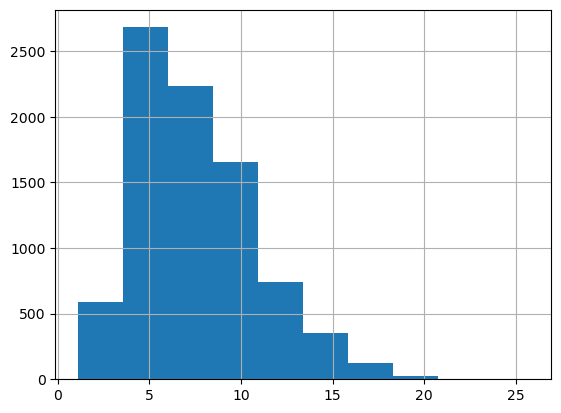

<Axes: >

dep_wind_spd


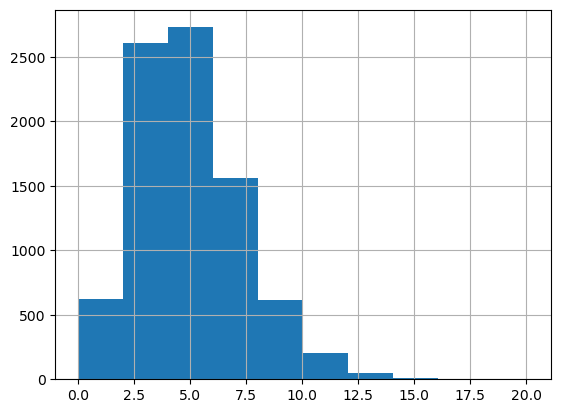

<Axes: >

arr_clouds


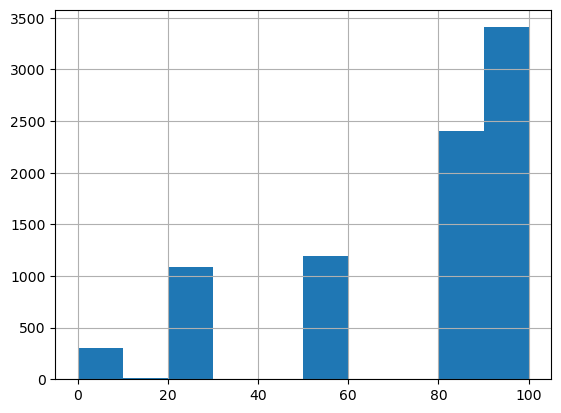

<Axes: >

arr_dewpt


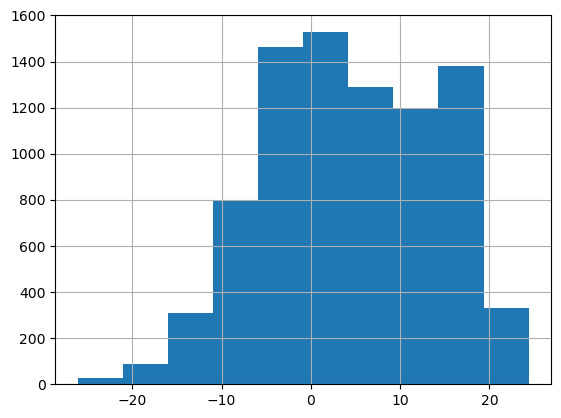

<Axes: >

arr_precip


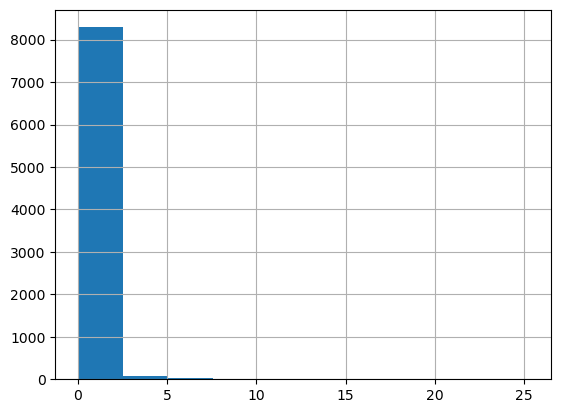

<Axes: >

arr_pres


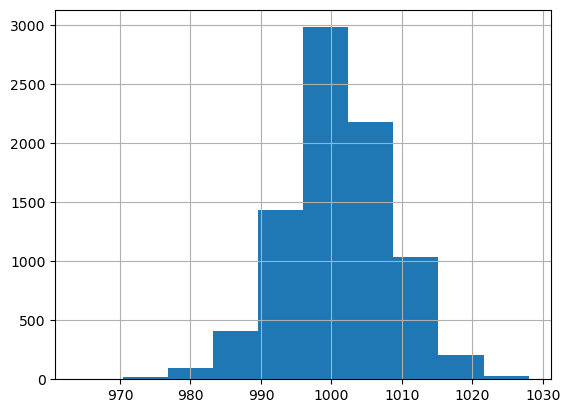

<Axes: >

arr_rh


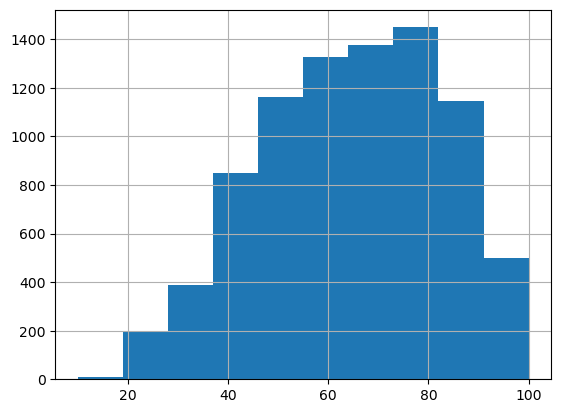

<Axes: >

arr_snow


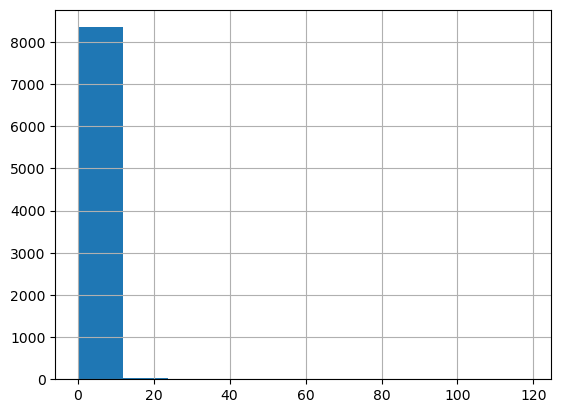

<Axes: >

arr_temp


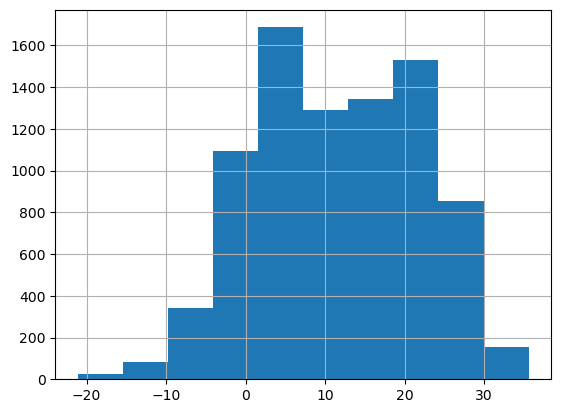

<Axes: >

arr_vis


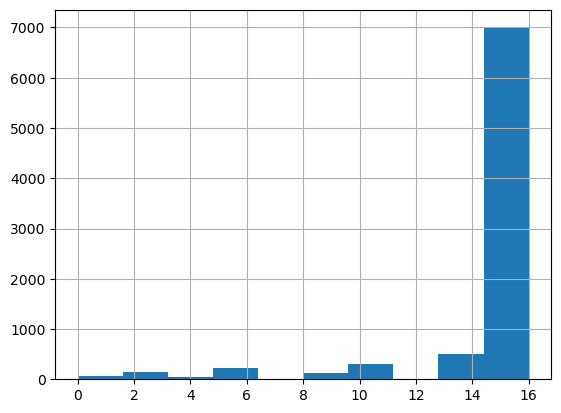

<Axes: >

arr_weather.code


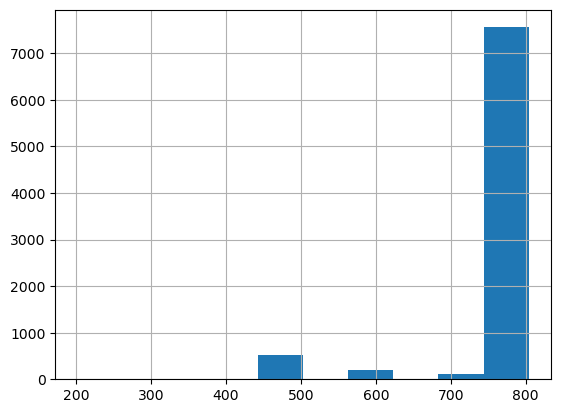

<Axes: >

arr_wind_dir


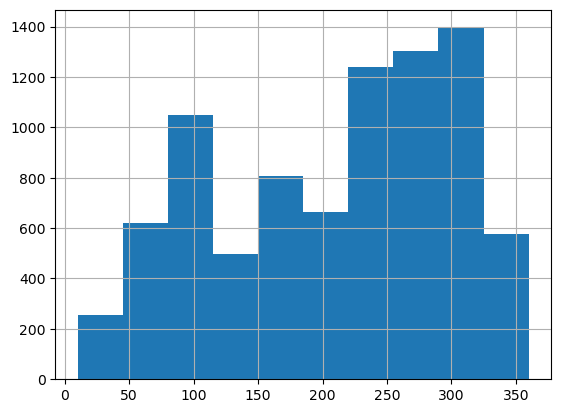

<Axes: >

arr_wind_gust_spd


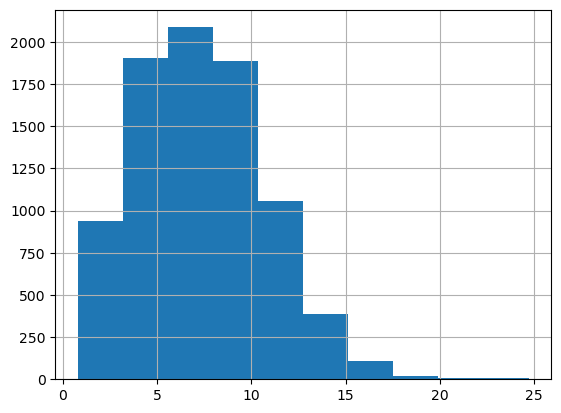

<Axes: >

arr_wind_spd


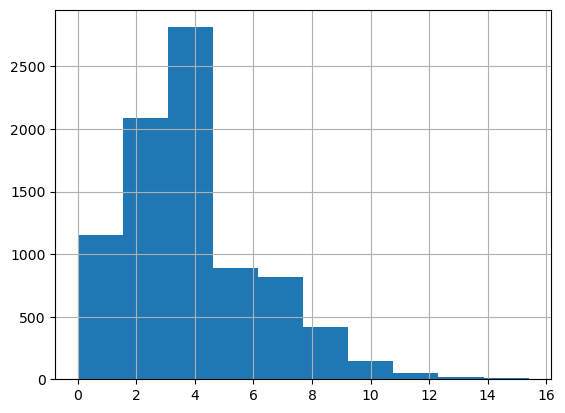

In [23]:
cols = sub_data.columns
print(cols)
for col in cols: 
    sub_data[col].hist()
    print(col)
    plt.show()

In [24]:
import plotly.express as px

In [25]:
sub_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [26]:
#for co in sub_data.columns:
fig = px.scatter(sub_data, y='arr_precip', x='arr_status', title='delay Over columns')
fig.show()

In [27]:
sub_data['dep_precip'] = sub_data['dep_precip']**2
sub_data['arr_precip'] = sub_data['arr_precip']**2

In [28]:
# correl = subset_data.corr()
correl = sub_data.corr(numeric_only=True)

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [29]:
#sub_data['Carrier_Code'].unique()

In [30]:
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "MQ", "AA", sub_data["Carrier_Code"])
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "9E", "DL", sub_data["Carrier_Code"])

In [31]:
su_data = sub_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
#su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])
#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [32]:
# su_data.drop(columns=['arr_status'],inplace = True)
# su_data.columns

In [33]:
su_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [34]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(su_data.drop(columns = ['arr_status']), su_data['arr_status'],stratify = su_data['arr_status'], test_size=0.1, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train_m
X_test_m
y_train_m
y_test_m

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_status,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
4400,9,5,JFK,10,5,31,55,1,25,17.50,...,0.00,1005,47,0.00,23.90,16,802,115,3.60,0.40
2151,18,2,ORD,21,2,20,14,2,87,12.70,...,0.00,998,93,0.00,16.70,6,804,250,5.60,1.50
3127,9,4,JFK,11,4,50,12,1,93,17.70,...,0.00,997,57,0.00,24.40,16,804,240,5.60,3.10
7295,20,6,MCO,23,6,40,16,1,25,10.40,...,0.00,1010,59,0.00,-4.40,16,804,100,8.00,3.60
8374,11,1,MCO,14,1,30,10,0,87,10.40,...,0.00,1001,78,0.00,1.70,14,804,270,5.60,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,12,5,JFK,13,5,30,45,0,43,-10.70,...,0.00,1013,46,0.00,-2.20,16,803,260,9.20,6.70
7727,16,5,MCO,19,5,17,0,0,25,-8.10,...,0.00,999,56,0.00,-13.90,16,802,320,7.60,2.10
2482,14,3,ORD,16,3,0,47,1,87,-1.90,...,6.25,991,89,0.00,11.70,10,500,100,10.00,3.10
7738,16,5,MCO,18,5,18,59,2,25,9.40,...,0.00,1009,50,0.00,-9.40,16,804,110,9.20,5.09


,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_status,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
6133,21,1,JFK,23,1,55,7,1,100,-3.80,...,0.00,1009,75,0.00,0.60,14,804,260,5.20,3.60
7162,13,1,JFK,14,1,30,41,1,0,-6.90,...,0.00,1015,66,0.00,-0.60,16,804,270,6.00,3.60
2873,16,1,JFK,18,1,59,27,0,87,6.90,...,0.00,1005,64,0.00,6.10,16,804,290,8.80,6.20
803,19,4,ORD,22,4,39,28,2,0,11.60,...,2.25,993,89,0.00,15.60,8,500,320,5.20,1.50
3381,9,4,JFK,11,4,59,8,1,59,17.00,...,0.00,1006,81,0.00,21.10,16,803,70,4.00,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,16,2,JFK,18,2,59,26,1,87,-0.20,...,0.00,1005,66,0.00,2.20,16,804,50,2.80,2.60
8094,10,5,MCO,13,5,50,32,2,25,14.30,...,0.00,1006,29,0.00,21.10,16,800,190,9.60,3.60
3344,21,0,JFK,23,0,40,3,1,87,14.00,...,0.00,993,73,0.00,21.10,16,804,240,4.40,3.10
6782,8,6,JFK,9,6,10,19,1,100,8.80,...,0.00,1005,65,0.00,10.60,16,804,350,8.00,2.60


4400    0
2151    2
3127    0
7295    0
8374    0
       ..
3785    0
7727    0
2482    1
7738    2
7121    0
Name: arr_status, Length: 7564, dtype: int32

6133    2
7162    1
2873    0
803     2
3381    0
       ..
2689    0
8094    2
3344    0
6782    2
5057    0
Name: arr_status, Length: 841, dtype: int32

In [35]:
# data to predict departure status
dep_data = X_train_m

In [36]:
# data to predict arrival status
arr_data = su_data.drop(columns = ['dep_status'])

In [37]:
dep_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

### Training to predict departure status

In [38]:
dep_data = pd.get_dummies(dep_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_data.head()
# su_data.dtypes
# su_data.columns

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4400,1,25,17.50,0.00,1019,54,0.00,27.60,16,100,...,False,False,False,False,False,False,True,False,False,False
2151,2,87,12.70,0.00,988,40,0.00,27.50,4,115,...,False,False,False,False,False,False,False,False,True,False
3127,1,93,17.70,0.00,1013,96,0.00,18.40,7,190,...,False,False,False,False,False,False,False,False,True,False
7295,1,25,10.40,0.00,1022,69,0.00,16.10,16,70,...,False,False,False,False,False,False,False,False,True,False
8374,0,87,10.40,0.00,1016,56,0.00,19.40,16,290,...,False,False,False,False,False,False,False,False,True,False


In [39]:
X_train, X_test, y_train, y_test = train_test_split(dep_data.drop(columns = ['dep_status']), dep_data['dep_status'],stratify = dep_data['dep_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
7775,50,18.80,0.00,1021,64,0.00,26.10,16,170,6.00,...,False,False,False,False,False,False,False,False,True,False
3410,18,-1.90,0.00,1027,35,0.00,13.20,16,280,2.80,...,False,False,False,False,True,False,False,False,False,False
421,71,-5.60,0.00,1002,53,0.00,3.00,16,340,2.40,...,False,False,False,False,False,False,False,False,True,False
6985,0,-3.30,0.00,1029,64,0.00,2.80,16,10,4.40,...,False,False,False,False,False,False,False,False,True,False
5136,100,12.70,6.25,1005,96,0.00,13.30,6,190,18.10,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,87,22.70,0.25,1012,61,0.00,31.10,16,110,9.80,...,False,False,False,False,False,False,True,False,False,False
5653,40,10.20,0.00,1017,59,0.00,18.30,16,95,7.60,...,False,False,False,False,True,False,False,False,False,False
5937,78,-2.90,0.00,1023,49,0.00,7.10,16,275,6.40,...,False,False,False,False,False,False,False,False,True,False
8132,50,18.20,0.00,1010,56,0.00,27.80,16,250,6.40,...,False,False,False,False,False,False,False,False,False,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
7403,25,17.10,0.00,1014,64,0.00,24.40,16,100,7.60,...,False,False,False,False,False,False,False,True,False,False
3320,50,18.50,0.00,1014,51,0.00,29.70,16,315,3.35,...,False,False,False,False,False,False,True,False,False,False
3133,87,9.50,0.00,1016,59,0.00,17.60,16,70,8.80,...,False,False,False,False,False,False,False,False,True,False
5246,87,7.00,0.00,985,85,0.00,9.40,16,290,16.60,...,False,False,False,False,False,False,False,False,True,False
5732,43,17.70,0.00,1015,49,0.00,29.50,16,110,3.60,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,87,17.60,0.00,984,54,0.00,27.80,16,250,8.40,...,False,False,False,False,False,False,False,False,True,False
6385,59,14.70,0.00,1009,81,0.00,18.00,15,185,4.40,...,False,False,False,False,False,False,False,True,False,False
2868,100,1.10,0.00,1030,78,0.00,4.50,16,115,6.40,...,False,False,False,False,False,False,False,False,True,False
5161,25,-6.10,0.00,1022,47,0.00,4.20,16,330,6.95,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

7403    0
3320    1
3133    2
5246    2
5732    0
       ..
936     1
6385    2
2868    0
5161    1
3340    2
Name: dep_status, Length: 1513, dtype: int32

In [40]:
# y = X_train['arr_status']
# u = X_test['arr_status']
# X_train.drop(columns=['arr_status'], inplace=True)
# X_test.drop(columns=['arr_status'], inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
7775,-0.56,1.10,-0.08,0.99,0.05,-0.06,1.09,0.31,-0.23,-0.49,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
3410,-1.59,-0.99,-0.08,1.43,-1.49,-0.06,-0.24,0.31,0.90,-1.46,...,-0.08,0.00,-0.07,0.00,5.37,-0.03,-0.39,-0.40,-1.21,0.00
421,0.11,-1.36,-0.08,-0.43,-0.54,-0.06,-1.30,0.31,1.52,-1.59,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6985,-2.17,-1.13,-0.08,1.58,0.05,-0.06,-1.32,0.31,-1.86,-0.98,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5136,1.04,0.49,0.52,-0.20,1.74,-0.06,-0.23,-3.17,-0.02,3.20,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,0.62,1.50,-0.05,0.32,-0.11,-0.06,1.61,0.31,-0.84,0.67,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,2.59,-0.40,-1.21,0.00
5653,-0.89,0.23,-0.08,0.69,-0.22,-0.06,0.29,0.31,-0.99,-0.00,...,-0.08,0.00,-0.07,0.00,5.37,-0.03,-0.39,-0.40,-1.21,0.00
5937,0.33,-1.09,-0.08,1.14,-0.75,-0.06,-0.87,0.31,0.85,-0.37,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
8132,-0.56,1.04,-0.08,0.17,-0.38,-0.06,1.27,0.31,0.59,-0.37,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.21,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
7403,-1.37,0.93,-0.08,0.47,0.05,-0.06,0.92,0.31,-0.94,-0.00,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.47,-1.21,0.00
3320,-0.56,1.07,-0.08,0.47,-0.64,-0.06,1.47,0.31,1.26,-1.30,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,2.59,-0.40,-1.21,0.00
3133,0.62,0.16,-0.08,0.62,-0.22,-0.06,0.21,0.31,-1.25,0.36,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5246,0.62,-0.09,-0.08,-1.69,1.16,-0.06,-0.64,0.31,1.00,2.74,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5732,-0.79,0.99,-0.08,0.54,-0.75,-0.06,1.45,0.31,-0.84,-1.22,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0.62,0.98,-0.08,-1.77,-0.48,-0.06,1.27,0.31,0.59,0.24,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6385,-0.28,0.69,-0.08,0.09,0.95,-0.06,0.25,-0.04,-0.07,-0.98,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.47,-1.21,0.00
2868,1.04,-0.68,-0.08,1.66,0.79,-0.06,-1.14,0.31,-0.79,-0.37,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5161,-1.37,-1.41,-0.08,1.06,-0.85,-0.06,-1.17,0.31,1.41,-0.20,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00


7775    1
3410    1
421     1
6985    0
5136    2
       ..
7441    2
5653    2
5937    1
8132    1
4274    2
Name: dep_status, Length: 6051, dtype: int32

7403    0
3320    1
3133    2
5246    2
5732    0
       ..
936     1
6385    2
2868    0
5161    1
3340    2
Name: dep_status, Length: 1513, dtype: int32

In [42]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
dep_model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

dep_model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
dep_model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
dep_model.coef_

# This is the coefficient Beta_0
dep_model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.5605685010742026

array([[-4.02663903e-02,  4.45188064e-01, -2.22678177e-01,
         1.20673643e-01, -2.33305388e-01, -1.63298523e-01,
        -4.11916424e-01, -1.79193066e-02, -6.55179660e-02,
        -1.15286006e-01,  5.02511643e-02,  4.32855343e-01,
         9.08050202e-02, -2.43377387e-01, -2.05294957e-02,
        -2.15165181e-02,  6.58679278e-02, -1.09178266e-01,
         9.89530464e-02,  4.16968139e-04, -5.71370339e-02,
         5.32961525e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.37315283e-02,  6.87183262e-02, -2.41960153e-01,
        -4.69812584e-01, -1.83816899e-01, -1.11161209e-01,
        -8.41146175e-04,  1.68989354e-01,  1.32344107e-01,
         5.69121938e-02, -3.58031349e-02,  1.34761530e-02,
         1.01239848e-01,  1.31634422e-01,  3.80860744e-02,
         1.72789442e-01,  9.10794490e-02, -1.10824179e-02,
         5.83055810e-02,  7.24076550e-02,  3.55391672e-02,
        -2.84192009e-03,  2.05791770e-02,  3.75538454e-0

array([-1.27127665, -0.03490375, -1.3303937 ])

In [43]:
dep_model.score(X_test,y_test)


0.5426305353602116

In [44]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test), index = X_test.index, columns = ['pred_dep_status'])
dep_model_output = dep_model_output.merge(y_test, left_index = True, right_index = True)
dep_model_output.head(20)

,pred_dep_status,dep_status
7403,2,0
3320,1,1
3133,1,2
5246,1,2
5732,1,0
8212,2,0
2422,1,1
8145,1,2
550,1,1
8382,1,2


In [45]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
dep_clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

dep_clf = dep_clf.fit(X_train, y_train) 
dep_clf.score(X_train, y_train)

dep_clf.feature_importances_
dep_clf_output = pd.DataFrame(dep_clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
dep_clf_output = dep_clf_output.merge(y_test, left_index = True, right_index = True)
dep_clf_output.head(20)
dep_clf.score(X_test, y_test)

0.8611799702528508

array([0.01969192, 0.06015157, 0.00615647, 0.05378581, 0.04314481,
       0.        , 0.06145097, 0.00746956, 0.05603113, 0.06288134,
       0.05067067, 0.01359632, 0.04509586, 0.00549168, 0.04105206,
       0.04644475, 0.00117561, 0.05106559, 0.00959514, 0.05747253,
       0.0451038 , 0.02675108, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00096285, 0.        , 0.00429824,
       0.00164841, 0.        , 0.00089475, 0.        , 0.00111542,
       0.00022835, 0.00712755, 0.0025718 , 0.        , 0.00378758,
       0.00171345, 0.00077199, 0.00667801, 0.00462276, 0.        ,
       0.00337941, 0.00427208, 0.0040287 , 0.00215572, 0.00060731,
       0.00235538, 0.0012554 , 0.01691073, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00143375, 0.0033287 , 0.00409016, 0.00101777,
       0.00189685, 0.00428994, 0.00124326, 0.00225225, 0.00362286,
       0.        , 0.        , 0.        , 0.00189473, 0.     

,pred_arr_status,dep_status
7403,0,0
3320,0,1
3133,0,2
5246,2,2
5732,0,0
8212,2,0
2422,1,1
8145,2,2
550,2,1
8382,1,2


0.42432253800396563

0.6992232688811767

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_pres            0.06
dep_dewpt           0.05
dep_temp            0.05
arr_dewpt           0.05
arr_temp            0.05
arr_rh              0.04
dep_rh              0.04
dep_wind_spd        0.04
dep_wind_gust_spd   0.04
dep_wind_dir        0.04
arr_wind_gust_spd   0.04
arr_pres            0.04
dtype: float64

,pred_Y
7403,1
3320,1
3133,1
5246,1
5732,1


,pred_Y,dep_status
7403,1,0
3320,1,1
3133,1,2
5246,1,2
5732,1,0


Fraction of correct classification 


0.5142101784534039

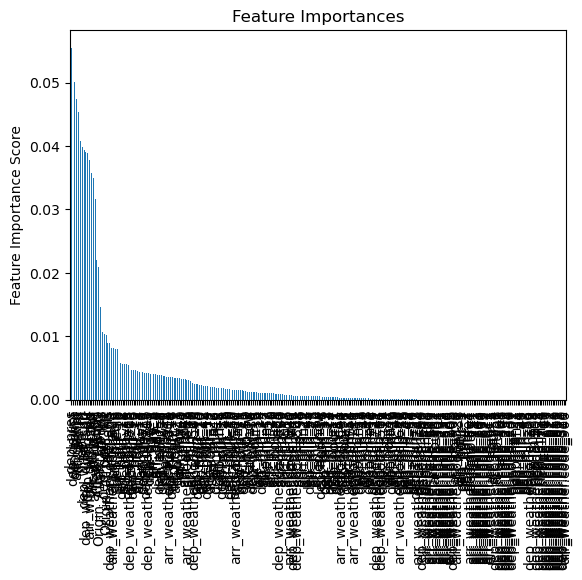

<Figure size 2000x1000 with 0 Axes>

In [46]:
dep_rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

dep_rf = dep_rf.fit(X_train, y_train) 
dep_rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(dep_rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

dep_rf_output = pd.DataFrame(dep_rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

dep_rf_output.head()
dep_rf_output = dep_rf_output.merge(y_test, left_index = True, right_index = True)
dep_rf_output.head()
print('Fraction of correct classification ')
dep_rf.score(X_test, y_test) 

In [47]:
dep_gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

dep_gb = dep_gb.fit(X_train, y_train) 
dep_gb.score(X_train, y_train) 

0.8172202941662535

In [48]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
dep_gb.score(X_test,y_test)

0.5135492399206874

### Training to predict arrival status

In [49]:
arr_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [50]:
X_train_m.columns
arr_data = X_train_m.merge(y_train_m, left_index = True, right_index = True)
arr_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'arr_status'],
      dtype='object')

In [51]:
arr_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
arr_status              int32
dtype: obj

In [52]:
arr_data['dep_status']= pd.Categorical(arr_data['dep_status'], categories = [0,1,2])

In [53]:
arr_data.dtypes
arr_data.columns

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
arr_status              int32
dtype: obj

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'arr_status'],
      dtype='object')

In [54]:
arr_data = pd.get_dummies(arr_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
arr_data.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4400,25,17.50,0.00,1019,54,0.00,27.60,16,100,2.80,...,False,False,False,False,False,False,True,False,False,False
2151,87,12.70,0.00,988,40,0.00,27.50,4,115,8.70,...,False,False,False,False,False,False,False,False,True,False
3127,93,17.70,0.00,1013,96,0.00,18.40,7,190,6.80,...,False,False,False,False,False,False,False,False,True,False
7295,25,10.40,0.00,1022,69,0.00,16.10,16,70,8.80,...,False,False,False,False,False,False,False,False,True,False
8374,87,10.40,0.00,1016,56,0.00,19.40,16,290,6.40,...,False,False,False,False,False,False,False,False,True,False


In [55]:
X_train, X_test, y_train, y_test = train_test_split(arr_data.drop(columns = ['arr_status']), arr_data['arr_status'],stratify = arr_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
8166,87,11.70,0.00,1015,48,0.00,23.30,16,110,5.09,...,False,False,False,False,False,False,False,False,True,False
6449,59,8.70,0.00,1007,40,0.00,23.10,16,335,7.20,...,False,False,False,False,False,False,False,False,True,False
7362,87,21.00,0.00,1013,71,0.00,26.70,16,110,6.40,...,False,False,False,False,False,False,False,False,False,False
6729,25,16.00,0.00,1015,62,0.00,23.80,16,230,7.60,...,False,False,False,False,False,False,False,False,True,False
2846,59,-0.60,0.00,1017,42,0.00,11.90,16,190,3.84,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,100,2.20,0.00,1017,76,0.00,6.10,16,60,6.40,...,False,False,False,False,False,False,False,False,True,False
4902,87,9.60,0.00,1019,63,0.00,16.70,16,200,2.47,...,False,False,False,False,False,False,False,False,True,False
5096,100,6.60,6.25,1019,89,0.00,8.30,9,110,14.10,...,False,False,False,False,False,False,False,False,True,False
2856,50,8.80,0.00,1007,44,0.00,21.60,16,270,12.40,...,False,False,False,False,False,False,False,False,True,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6375,25,9.10,0.00,1009,46,0.00,21.10,16,235,7.20,...,False,False,False,False,False,False,True,False,False,False
7459,50,21.00,0.25,1015,47,0.00,33.90,16,295,4.00,...,False,False,False,False,False,False,False,False,False,False
3003,40,0.30,0.00,1003,58,0.00,8.10,16,310,10.80,...,False,False,False,False,False,False,False,False,True,False
5249,87,-7.40,0.00,1023,49,0.00,2.20,16,320,13.50,...,False,False,False,False,False,False,False,False,False,False
5394,100,-11.30,0.00,1025,48,0.00,-1.80,16,275,4.80,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,100,12.40,5.06,986,90,0.00,14.00,5,95,9.20,...,False,False,False,False,False,False,False,True,False,False
1753,100,16.70,0.00,998,87,0.00,18.90,16,40,8.00,...,False,False,False,False,False,False,False,False,True,False
564,100,-1.20,0.00,983,85,0.00,1.10,9,230,8.40,...,False,False,False,False,False,False,False,False,True,False
5778,87,19.50,0.00,1021,79,0.00,23.30,16,150,6.00,...,False,False,False,False,False,False,False,False,False,False


dtype('int32')

6375    0
7459    0
3003    0
5249    1
5394    2
       ..
42      0
1753    1
564     2
5778    2
3242    0
Name: arr_status, Length: 1513, dtype: int32

In [56]:
X_test_o = X_test
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train = pd.DataFrame(sc2.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc2.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
8166,0.63,0.39,-0.08,0.54,-0.79,-0.05,0.81,0.31,-0.86,-0.78,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
6449,-0.26,0.09,-0.08,-0.06,-1.22,-0.05,0.79,0.31,1.45,-0.13,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
7362,0.63,1.33,-0.08,0.39,0.42,-0.05,1.16,0.31,-0.86,-0.38,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
6729,-1.34,0.82,-0.08,0.54,-0.05,-0.05,0.86,0.31,0.37,-0.01,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
2846,-0.26,-0.85,-0.08,0.69,-1.11,-0.05,-0.38,0.31,-0.04,-1.16,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,1.05,-0.57,-0.08,0.69,0.69,-0.05,-0.98,0.31,-1.37,-0.38,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
4902,0.63,0.18,-0.08,0.84,-0.00,-0.05,0.12,0.31,0.07,-1.58,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
5096,1.05,-0.13,0.56,0.84,1.37,-0.05,-0.75,-2.13,-0.86,1.99,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
2856,-0.55,0.10,-0.08,-0.06,-1.00,-0.05,0.63,0.31,0.78,1.46,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6375,-1.34,0.13,-0.08,0.09,-0.90,-0.05,0.58,0.31,0.43,-0.13,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.61,-0.40,-1.21,0.00
7459,-0.55,1.33,-0.05,0.54,-0.85,-0.05,1.91,0.31,1.04,-1.11,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
3003,-0.86,-0.76,-0.08,-0.35,-0.27,-0.05,-0.78,0.31,1.19,0.97,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
5249,0.63,-1.54,-0.08,1.14,-0.74,-0.05,-1.39,0.31,1.30,1.80,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
5394,1.05,-1.93,-0.08,1.29,-0.79,-0.05,-1.81,0.31,0.84,-0.87,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.47,-1.21,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,1.05,0.46,0.44,-1.62,1.42,-0.05,-0.16,-3.52,-1.01,0.48,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.47,-1.21,0.00
1753,1.05,0.89,-0.08,-0.73,1.27,-0.05,0.35,0.31,-1.57,0.11,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
564,1.05,-0.91,-0.08,-1.84,1.16,-0.05,-1.51,-2.13,0.37,0.24,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
5778,0.63,1.18,-0.08,0.99,0.84,-0.05,0.81,0.31,-0.45,-0.50,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00


8166    0
6449    1
7362    0
6729    2
2846    0
       ..
2936    1
4902    0
5096    2
2856    1
6362    2
Name: arr_status, Length: 6051, dtype: int32

6375    0
7459    0
3003    0
5249    1
5394    2
       ..
42      0
1753    1
564     2
5778    2
3242    0
Name: arr_status, Length: 1513, dtype: int32

In [57]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
arr_model2 = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

arr_model2.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
arr_model2.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
arr_model2.coef_

# This is the coefficient Beta_0
arr_model2.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.7372335151214675

array([[-1.50876053e-02,  8.23400164e-01, -6.63455315e-01,
        -1.64053583e-02, -3.71286740e-01, -8.29288149e-01,
        -7.19331429e-01,  1.41635986e-01,  4.81125281e-02,
        -2.16710525e-01,  7.06046104e-02,  1.79279002e-01,
        -4.03289331e-01, -6.17028071e-01,  1.26336043e-02,
        -1.33213551e-02, -3.74093303e-02,  3.05037627e-01,
         5.72361598e-02, -1.33671630e-01, -3.69714452e-02,
         7.35842370e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.20787730e-01,  2.95202836e-01,  3.66588844e-01,
         3.45366240e-01,  1.58585004e-01,  7.95202780e-02,
         2.06639451e-01,  1.41056841e-01,  1.65768230e-01,
        -2.70992481e-02,  1.79968687e-01,  4.45301716e-02,
        -2.14130639e-01, -7.74577284e-02, -2.00864115e-01,
        -2.83306492e-01, -7.25269821e-01, -3.44672434e-01,
         8.10421290e-03,  2.93259835e-02, -4.16374123e-03,
         3.30912529e-04,  1.60428138e-02,  2.25446352e-0

array([-0.2093587 , -1.50614852, -1.6698709 ])

In [58]:
arr_model2.score(X_test,y_test)


0.7131526768010575

In [59]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
arr_clf2 = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

arr_clf2 = arr_clf2.fit(X_train, y_train) 
arr_clf2.score(X_train, y_train)

arr_clf2.feature_importances_
arr_clf2_output = pd.DataFrame(arr_clf2.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
arr_clf2_output = arr_clf2_output.merge(y_test, left_index = True, right_index = True)
arr_clf2_output.head(20)
arr_clf2.score(X_test, y_test)

0.8972070732110395

array([1.17493609e-02, 3.53377923e-02, 3.29124948e-03, 2.39115870e-02,
       4.26291278e-02, 0.00000000e+00, 2.82824296e-02, 7.06357039e-03,
       3.34798748e-02, 3.41195029e-02, 3.55432075e-02, 7.98559732e-03,
       3.12295734e-02, 3.63199534e-03, 2.49131822e-02, 2.73779447e-02,
       1.87764309e-03, 2.16484147e-02, 9.18957785e-03, 2.82801182e-02,
       3.34068489e-02, 1.81197860e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.28144280e-04, 3.79441544e-04, 6.61082140e-04,
       1.23086569e-03, 0.00000000e+00, 3.16065684e-03, 0.00000000e+00,
       0.00000000e+00, 1.01211380e-03, 2.12474412e-04, 7.32638998e-04,
       1.61627625e-03, 9.03072826e-04, 1.58572586e-04, 2.15994720e-03,
       0.00000000e+00, 3.39484744e-03, 1.33404070e-03, 9.71880162e-04,
       1.13266133e-04, 9.70043522e-04, 9.03908157e-04, 5.66024243e-03,
       8.21694308e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

,pred_arr_status,arr_status
6375,0,0
7459,1,0
3003,0,0
5249,1,1
5394,0,2
4078,1,0
5484,0,0
6860,0,0
1521,0,0
6748,2,2


0.6153337739590218

0.7547512807800364

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_status_2        0.34
dep_status_1        0.06
dep_dewpt           0.03
dep_temp            0.03
dep_pres            0.03
arr_rh              0.03
arr_dewpt           0.03
dep_rh              0.03
dep_wind_gust_spd   0.03
arr_temp            0.02
dep_wind_spd        0.02
dep_wind_dir        0.02
dtype: float64

,pred_Y
6375,0
7459,0
3003,0
5249,0
5394,0


,pred_Y,arr_status
6375,0,0
7459,0,0
3003,0,0
5249,0,1
5394,0,2


Fraction of correct classification 


0.7105089226701917

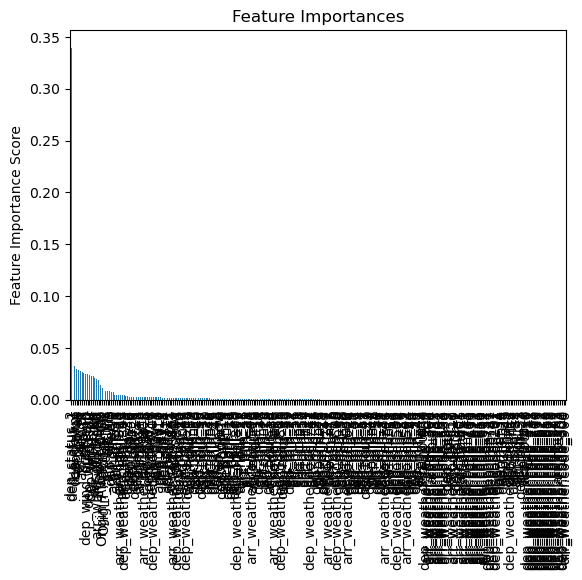

<Figure size 2000x1000 with 0 Axes>

In [60]:
arr_rf2 = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

arr_rf2 = arr_rf2.fit(X_train, y_train) 
arr_rf2.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(arr_rf2.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

arr_rf2_output = pd.DataFrame(arr_rf2.predict(X_test), index = X_test.index, columns = ['pred_Y'])

arr_rf2_output.head()
arr_rf2_output = arr_rf2_output.merge(y_test, left_index = True, right_index = True)
arr_rf2_output.head()
print('Fraction of correct classification ')
arr_rf2.score(X_test, y_test) 

In [61]:
arr_gb2 = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

arr_gb2 = arr_gb2.fit(X_train, y_train) 
arr_gb2.score(X_train, y_train) 

0.8770451165096679

In [62]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
arr_gb2.score(X_test,y_test)

0.7111698612029081

In [63]:
X_test_o = X_test_m.drop(columns = ['dep_status'])
X_test_o = pd.get_dummies(X_test_o, drop_first = True)
X_test_o_1 = pd.DataFrame(sc.transform(X_test_o), columns = X_test_o.columns, index = X_test_o.index)
X_test_o_1.head()

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6133,1.04,-1.18,-0.08,1.21,-0.43,-0.06,-1.15,0.31,1.00,0.33,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
7162,-2.17,-1.49,-0.08,1.43,-0.96,-0.06,-1.20,0.31,1.31,0.52,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
2873,0.62,-0.10,-0.08,0.69,0.90,-0.06,-0.55,0.31,0.13,-0.49,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
803,-2.17,0.38,-0.08,-1.24,0.10,-0.06,0.29,0.31,-1.45,-0.61,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.21,0.00
3381,-0.28,0.92,-0.08,0.91,0.95,-0.06,0.50,-1.08,1.26,-1.59,...,-0.08,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.47,-1.21,0.00


In [64]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test_o_1), index = X_test_o_1.index, columns = ['dep_status'])
dep_model_output = dep_model_output.merge(X_test_o, left_index = True, right_index = True)
dep_model_output.head(20)

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6133,0,100,-3.80,0.00,1024,55,0.00,4.40,16,290,...,False,False,False,False,False,False,False,False,True,False
7162,0,0,-6.90,0.00,1027,45,0.00,3.90,16,320,...,False,False,False,False,False,False,False,False,True,False
2873,1,87,6.90,0.00,1017,80,0.00,10.20,16,205,...,False,False,False,False,False,False,False,False,True,False
803,1,0,11.60,0.00,991,65,0.00,18.30,16,50,...,False,False,False,False,False,False,False,False,False,False
3381,1,59,17.00,0.00,1020,81,0.00,20.40,12,315,...,False,False,False,False,False,False,False,True,False,False
8192,0,100,12.00,0.00,1019,56,0.00,21.10,16,70,...,False,False,False,False,False,False,False,True,False,False
15,1,100,-0.80,0.00,991,71,0.00,4.00,16,25,...,False,False,False,False,False,False,False,False,True,False
7683,0,87,19.80,0.00,1013,58,0.00,28.90,16,180,...,False,False,False,False,False,False,False,False,False,False
4772,1,100,17.20,0.00,1015,96,0.00,17.80,16,60,...,False,False,False,False,False,False,False,False,True,False
5142,1,25,-6.80,0.00,1025,39,0.00,6.10,16,280,...,False,False,False,False,False,False,False,False,True,False


In [65]:
dep_model_output['dep_status']= pd.Categorical(dep_model_output['dep_status'], categories = [0,1,2])

In [66]:
dep_model_output = pd.get_dummies(dep_model_output, columns=['dep_status'],drop_first = True)

In [67]:
dep_model_output = dep_model_output[X_test.columns]
dep_model_output.head()

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6133,100,-3.80,0.00,1024,55,0.00,4.40,16,290,8.70,...,False,False,False,False,False,False,False,False,True,False
7162,0,-6.90,0.00,1027,45,0.00,3.90,16,320,9.30,...,False,False,False,False,False,False,False,False,True,False
2873,87,6.90,0.00,1017,80,0.00,10.20,16,205,6.00,...,False,False,False,False,False,False,False,False,True,False
803,0,11.60,0.00,991,65,0.00,18.30,16,50,5.60,...,False,False,False,False,False,False,False,False,False,False
3381,59,17.00,0.00,1020,81,0.00,20.40,12,315,2.40,...,False,False,False,False,False,False,False,True,False,False


In [68]:
# dep_model_output = dep_model_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
#        'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
#        'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
#        'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
#        'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
#        'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
#        'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
# dep_model_output.dtypes

In [69]:

dep_model_output = pd.DataFrame(sc2.transform(dep_model_output), columns = dep_model_output.columns, index = dep_model_output.index)

In [70]:
arr_model2.score(dep_model_output,y_test_m)

0.5208085612366231

In [71]:
pred_data1 = pd.read_csv('pred_data1.csv')
pred_data1.head()
pred_data1.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,18,4,ORD,21,4,52,47,69,8.00,...,0.00,996.50,35,0,12.70,24.00,801,280,12.50,8.40
1,2,13,4,JFK,14,4,34,51,84,7.20,...,0.00,"1,019.50",58,0,12.10,24.00,804,110,7.20,5.20
2,4,11,4,MCO,14,4,35,20,84,7.20,...,0.00,"1,015.00",58,0,28.10,24.00,801,280,2.40,2.00
3,6,18,5,ORD,21,5,52,47,23,-2.40,...,0.00,994.00,40,0,9.70,24.13,803,296,6.66,4.40
4,8,13,5,JFK,14,5,25,41,71,-1.20,...,0.00,"1,014.50",46,0,15.80,24.00,803,283,5.73,4.13


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [72]:

pred_data1['dep_min'] = pred_data1['dep_min'].astype('object')
pred_data1['arr_min'] = pred_data1['arr_min'].astype('object')
pred_data1['dep_hour'] = pred_data1['dep_hour'].astype('object')
pred_data1['dep_day'] = pred_data1['dep_day'].astype('object')
pred_data1['arr_hour'] = pred_data1['arr_hour'].astype('object')
pred_data1['arr_day'] = pred_data1['arr_day'].astype('object')
pred_data1['dep_weather.code'] = pred_data1['dep_weather.code'].astype('object')
pred_data1['arr_weather.code'] = pred_data1['arr_weather.code'].astype('object')
pred_data1.drop(columns=['Unnamed: 0'],inplace=True)
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd']]

pred_data1.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [73]:
pred_data1['dep_hour'] = pd.Categorical(pred_data1['dep_hour'], categories=[i for i in range(24)])
pred_data1['dep_day'] = pd.Categorical(pred_data1['dep_day'], categories=[i for i in range(7)])
pred_data1['dep_min'] = pd.Categorical(pred_data1['dep_min'], categories=[i for i in range(60)])
pred_data1['arr_hour'] = pd.Categorical(pred_data1['arr_hour'], categories=[i for i in range(24)])
pred_data1['arr_day'] = pd.Categorical(pred_data1['arr_day'], categories=[i for i in range(7)])
pred_data1['arr_min'] = pd.Categorical(pred_data1['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data1['Origin_Airport'] = pd.Categorical(pred_data1['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
pred_data1['arr_weather.code'] = pd.Categorical(pred_data1['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data1['dep_weather.code'] = pd.Categorical(pred_data1['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [74]:
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd']]

In [75]:
pred_data1.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [76]:
pred_data = pred_data1

In [77]:
pred_data1 = pd.get_dummies(pred_data1, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data1.head()
pred_data1.dtypes
pred_data1.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


dep_clouds                int64
dep_dewpt               float64
dep_precip              float64
dep_pres                float64
dep_rh                    int64
                         ...   
arr_weather.code_801       bool
arr_weather.code_802       bool
arr_weather.code_803       bool
arr_weather.code_804       bool
arr_weather.code_900       bool
Length: 270, dtype: object

Index(['dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_wind_dir', 'dep_wind_gust_spd',
       ...
       'arr_weather.code_721', 'arr_weather.code_731', 'arr_weather.code_741',
       'arr_weather.code_751', 'arr_weather.code_800', 'arr_weather.code_801',
       'arr_weather.code_802', 'arr_weather.code_803', 'arr_weather.code_804',
       'arr_weather.code_900'],
      dtype='object', length=270)

In [78]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data1), columns = pred_data1.columns, index = pred_data1.index)


In [79]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test), index = X_test.index, columns = ['dep_status'])
dep_model_output = dep_model_output.merge(pred_data, left_index = True, right_index = True)
dep_model_output.head(30)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,dep_status,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,1,18,4,ORD,21,4,52,47,19,-2.40,...,0.50,999.00,73,0,12.70,19.20,803,260,8.30,5.60
1,2,13,4,JFK,14,4,34,51,82,4.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
2,2,11,4,MCO,14,4,35,20,14,19.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
3,1,18,5,ORD,21,5,52,47,68,-3.20,...,0.00,998.50,53,0,6.50,24.13,802,276,8.53,5.86
4,2,13,5,JFK,14,5,25,41,66,4.30,...,0.00,"1,000.50",44,0,10.50,20.40,804,290,11.20,8.00
5,1,13,5,MCO,16,5,35,25,2,16.30,...,0.00,996.50,45,0,9.70,21.30,803,283,10.93,7.73
6,0,18,6,ORD,21,6,52,47,3,-1.40,...,0.00,996.50,46,0,8.00,24.13,801,256,12.83,8.66
7,2,13,6,JFK,14,6,35,51,64,-1.10,...,0.00,997.50,38,0,10.60,24.13,803,270,12.30,8.40
8,1,11,6,MCO,13,6,5,50,37,18.80,...,0.00,998.00,41,0,9.80,24.13,803,270,11.80,8.00
9,0,18,0,ORD,21,0,52,47,75,1.00,...,0.00,"1,003.00",43,0,7.00,24.13,801,270,6.54,4.45


In [80]:
dep_model_output['dep_status']= pd.Categorical(dep_model_output['dep_status'], categories = [0,1,2])

In [81]:
dep_model_output = dep_model_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
dep_model_output.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres              float64
dep_rh                  int64
dep_snow                int64
dep_temp              float64
dep_vis               float64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres              float64
arr_rh                  int64
arr_snow                int64
arr_temp              float64
arr_vis               float64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: object

In [82]:
dep_model_output = pd.get_dummies(dep_model_output, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_model_output.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


In [83]:

dep_model_output = pd.DataFrame(sc2.transform(dep_model_output), columns = dep_model_output.columns, index = dep_model_output.index)

In [84]:
output = pd.DataFrame(arr_model2.predict(dep_model_output), index = dep_model_output.index, columns = ['arr_status'])

In [85]:
output

,arr_status
0,0
1,2
2,2
3,0
4,2
5,1
6,0
7,2
8,0
9,0
